In [1]:
import re
from nltk.stem import PorterStemmer 
import pandas as pd
import numpy as np

# Midterm Project-Building a Spam Filter

The purpose of this project is to train a classifier to detect email spams (spam $y=1$, non-spam $y=0$).

First, we need to change any text email to numerical values (a feature vector $\boldsymbol{x}\in\mathbb{R}^n$). We walk through the steps of constructing such a vector from an email.

## Preprocessing Emails (20 pts)

The file named "email1.txt" contains an example email that contains words, numbers, an email address, a URL, special letters (e.g. the dollar sign). Since many emails may contain numbers, email addresses, URLs, special letters, it is common practice to "normalize" these values, so that all email addresses, URLs, etc. are treated the same. For example, we can replace any URL with a special string "httpaddress" to indicate a URL exists. The purpose is to let the spam classifier know a URL is present, instead of what the URL is. Following this idea, we will implement the following steps for any raw email:

1. Lower-casing: convert all letters to lower case
2. Normalizing URLs: All URLs are replaced with the text "httpaddr".
3. Normalizing email addresses: Replace all email addresses with the text "emailaddr"
4. Normalizing numbers: Replace all numbers with the text "number".
5. Normalizing Dollars: Replace all dollar signs $\$$ with the text "dollar".
6. Stemming words: For example, "replacing", "replaces", "replaced" are all replaced with "replace"
7. Removing non-words: Remove non-words and punctuations. All white spaces (tabs, newlines ('\n'), spaces) should be trimmed to a single space character.

To achieve all the 7 steps, we look at an example. Read in "email1.txt" as a single string:

In [2]:
email = open('email1.txt', 'r').read()
email

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

Here are the codes to realize all the steps above in Python. Suppose we have a string variable named str1.

1. str1.lower() converts all uppercase characters in str1 into lowercase characters (note that str1 itself does not change.)
2. Replace URLs by: re.sub(r'(http|https)://[^\s]*', 'httpaddr', str1)
3. Replace email addresses by: re.sub('[^\s]+@[^\s]+', 'emailaddr', str1);
4. Replace all numbers by: re.sub('[0-9]+', 'number', str1)
5. Replace dollar sign by: re.sub('[$]+', 'dollar', str1)
6. Word Stemming: first build a PorterStemmer class by: ps = PorterStemmer(), then stemming the words by: 

str1 = " ".join([ps.stem(word) for word in str1.split()])

7. Remove non-words and punctuations by: 

Trim white spaces to a single space character by: re.sub(r'\s+',' ', str1)

Finally strip the string (remove spaces at the beginning and at the end of the string) by:
str1 = str1.strip()

In [3]:
# First we will "normalize" the emails 

# 1. Lower-casing: convert all letters to lower case
# email.lower() will convert all uppercase characters in the string data into lowercase characters 
# Note that the email data itself does not change
email_string = email.lower()

# 2. Normalizing URLs: All URLs are replaced with the text "httpaddr".
# Replace URLs by: re.sub(r'(http|https)://[^\s]*', 'httpaddr', str1)

email_string = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email_string)

# 3. Normalizing email addresses: Replace all email addresses with the text "emailaddr"
# Replace email addresses by: re.sub('[^\s]+@[^\s]+', 'emailaddr', str1);

email_string = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_string)

# Normalizing numbers: Replace all numbers with the text "number".
# Replace all numbers by: re.sub('[0-9]+', 'number', str1)

email_string = re.sub('[0-9]+', 'number', email_string)

# 5. Normalizing Dollars: Replace all dollar signs $ with the text "dollar"
# Replace dollar sign by: re.sub('[$]+', 'dollar', str1)

email_string = re.sub('[$]+', 'dollar', email_string)

# 6. Stemming words: For example, "replacing", "replaces", "replaced" are all replaced with "replace"
# Word Stemming: first build a PorterStemmer class by: ps = PorterStemmer(), then stemming the words by: 

# str1 = " ".join([ps.stem(word) for word in str1.split()])

ps = PorterStemmer()
email_string = " ".join([ps.stem(word) for word in email_string.split()])

# 7. Removing non-words: Remove non-words and punctuations. 
# All white spaces (tabs, newlines ('\n'), spaces) should be trimmed to a single space character.

# Remove non-words and punctuations by:
# re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', str1)

email_string = re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', email_string)

# Remove Leading and Treailing spaces
email_string = email_string.strip()

# Remove all white spaces
#email_string = email_string.replace(" ", "")
# This is not what we want as this removes all of the white space entirely 
# Remove Duplicate White Spaces
email_string = " ".join(email_string.split())

# Now we will print out the Normalizes email string
print(email_string)

anyon know how much it cost to host a web portal well it depend on how mani visitor your expecting thi can be anywher from less than number buck a month to a coupl of dollarnumber you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr


Try each of this steps on the email string, and see if it works (you don't need to show the process). If everything works, then put everything in a function of the following form: 

In [4]:
def ProcessEmail(emailstring):
    email_string = email.lower()
    email_string = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email_string)
    email_string = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_string)
    email_string = re.sub('[0-9]+', 'number', email_string)
    email_string = re.sub('[$]+', 'dollar', email_string)
    ps = PorterStemmer()
    email_string = " ".join([ps.stem(word) for word in email_string.split()])
    email_string = re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', email_string)
    email_string = email_string.strip()
    email_string = " ".join(email_string.split())
    return(email_string)
    
    """
    Process the 7 steps above for an email string
    input: emailstring: the string that contains the email content. type: string
    return: a string that is the processed email content
    """
    
# Now we will use the ProcessEmail function that we have just created to process our email 
Processed_Email = ProcessEmail(email)

# Now we will print out the processed email 
print(Processed_Email)

anyon know how much it cost to host a web portal well it depend on how mani visitor your expecting thi can be anywher from less than number buck a month to a coupl of dollarnumber you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr


Finish the body of the function.

Run the function ProcessEmail for the email string that was read in earlier. If you get the following content, then congratulations, your code works.

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

## Vocabulary List (25 pts)

After the emails are preprocessed, we now have a string that contains a list of words for
each email. In the next step, we choose the words we would like to use in our classifier and ignore the rest. Suppose, based on a large number of email samples, we have already chosen the most frequently occuring words as the set of words to be considered, known as the vocabulary list, which is stored in vocab.txt. 

In [7]:
vocab_df = pd.read_csv('vocab.txt', delim_whitespace=True, names=['index', 'word'])
vocab_df.head()

,index,word
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


Each word has an index.

Given the vocabulary list, we can now map each word in the preprocessed emails into a list of indices, each of which is the index of the word in the vocabulary list. Specifically, in the sample email, the word "anyon" can be mapped onto the index 86 in the vocabulary
list. If a word is not in the vocabulary, ignore it. Now write a function in the following form:

In [28]:
def EmailToIndices(processed_email, vocab_df):
    
    # First turn the email string into a list of words by processed_email.split();
    
    list_of_words = processed_email.split()
    
    # For each word check if it is in the vocabulary
    # If it is in it, then find the corresponding index & append it to your index list; otherwise ignore it
    # To build the list of indicies, you can start with an empy list [] and append indcies one by one as you
    # find them using the append function associated with the list 
    empty_list = []
    
    # Create a list of vocab words
    
    vocab_list = list(vocab_df.iloc[:,1])
    
    # Now we will create an if stastement 
    for word in list_of_words:
        if word in vocab_list:
            index=vocab_list.index(word)
            empty_list.append(index+1)
        else: continue
        
    return(empty_list)
    

    

Position_List = EmailToIndices(Processed_Email, vocab_df)

print(Position_List)

    

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


Test your EmailToIndices function on the preprocessed email string obtained earlier. If you get the following list of integers, congratulations again, your code works.

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]

## Extracting Features from Emails (25 pts)

Now we will convert each email into a vector in $R^n$ as the features, where $n$ is the number of words in the vocabulary list. Specifically, the feature $x_i=0$ or $1$ for an email depending on whether the $i$-th word in the vocabulary list occurs in the email. That is, $x_i = 1$ if the $i$-th word is in the email and $x_i = 0$ if the i-th word is not present in the email. Write a function that converts a list of indices obtained from the previous function to a feature vector in $R^n$. Follow the following form:

In [63]:
features = emailFeatures(word_indices);
print('Length of feature vector: ', len(features));


Length of feature vector:  1899


In [80]:
def FeatureExtraction(indices, vocab_df):
    # First we will create an empty list.
    empty_list=[]
    
    # Create a list of the Vocab words.
    vocab_list=list(vocab_df.iloc[:,0])
    
    # Create a for loop
    for wordnum in vocab_list:
        if wordnum in indices:
            empty_list.append(1)
        else:
            empty_list.append(0)
    return(empty_list)

Features=FeatureExtraction(Position_List,vocab_df)
#print(Feature_vector)

print('Length of feature vector:' ,len(Features))
print('Number of non-zero entries:', np.sum(features));

Length of feature vector: 1899
Number of non-zero entries: 39.0


Run the function on the list of indices obtained from the previous problem to get the feature vector. Report the number of nonzeros in the vector and the size of the vector.

## Training SVM for Spam Classification (30 pts)

Now suppose we have preprocessed a bunch of emails and manually labled them. Each original email was processed using the ProcessEmail, EmailToIndices, and FeatureExtraction functions in sequence, and converted into a vector in $R^{1899}$. We use the data to train a Linear SVM classifier. The file "spamTrain.npy" contains 4000 training examples of spam and non-spam email, while "spamTest.npy" contains 1000 test examples. The last column is the target label (spam: y=1, non-spam: y=0). Use np.load(filename) to read in the data.

1. For training the linear SVM, consider $C=\{0.05, 1.0, 2.0\}$. Set random_state=10, loss='hinge', and all the other parameters are by default. For each model report the accuracy on the test data (LinearSVC has a built in function to calculate accuracy). Also report the best model based on the accuracy values.

2. Look at the parameters $\boldsymbol{w}=\{w_1,w_2,\dots,w_n\}$ of the underlying linear model. Make a plot of the absolute values of $\boldsymbol{w}$ versus the indices $[0,1,2,...n-1]$. Are some weights $w_i$ significantly larger than the rest of the weights from the graph? If so, the words corresponding to the larger weights are the most predictive of spam. Find those words. (Hint: you need to find the indices (positions) of the 15 largest values in the vector $\boldsymbol{w}$. The function np.argsort may help. Check the usage of the function. Then use the indices to find the words in the vocabulary data frame.

In [96]:
# Read in the Training & Validation Data

Train_Data = np.load('spamTrain.npy')
Test_Data = np.load('spamTest.npy')

In [101]:
from sklearn import svm

# Create the X matrix & y vector for the Training Dataset
X_train = Train_Data[:,0:1899]
y_train = Train_Data[:,1899]

X_test = Test_Data[:,0:1899]
y_test = Test_Data[:,1899]


In [108]:
# Creating the Linear SVM pipeline

# Create the Linear SVM Model for c=0.05
linear_svm_005 = svm.LinearSVC(C=0.05, loss='hinge', random_state=10)
#Fit the model
linear_svm_005.fit(X_train, y_train)
# Compute the Accuracy Score
y_pred = linear_svm_005.predict(X_test)
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('The Accuracy scores when C=0.05 is as follows:', Accuracy)

# Create the Linear SVM Model for c=1.0
linear_svm_1 = svm.LinearSVC(C=1.0, loss='hinge', random_state=10)
#Fit the model
linear_svm_1.fit(X_train, y_train)
y_pred = linear_svm_1.predict(X_test)
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('The Accuracy scores when C=0.05 is as follows:', Accuracy)

# Create the Linear SVM Model for c=2.0
linear_svm_2 = svm.LinearSVC(C=2.0, loss='hinge', random_state=10)
#Fit the model
linear_svm_2.fit(X_train, y_train)
y_pred = linear_svm_2.predict(X_test)
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('The Accuracy scores when C=0.05 is as follows:', Accuracy)

The Accuracy scores when C=0.05 is as follows: 0.992
The Accuracy scores when C=0.05 is as follows: 0.977
The Accuracy scores when C=0.05 is as follows: 0.974


Thus, the best model based on the accuracy values is when $C=0.05$

In [46]:


# Create a function to read the fixed vocab list.
def getVocabList():
    """
    Reads the fixed vocabulary list in vocab.txt
    and returns a dictionary of the words in vocabList.
    """
    # Read the fixed vocabulary list.
    with open('vocab.txt', 'r') as vocab:
        
        # Store all dictionary words in dictionary vocabList.
        vocabList = {}
        for line in vocab.readlines():
            i, word = line.split()
            vocabList[word] = int(i)

    return vocabList

# Create a list of vocab words    
vocab_list = list(vocab_df.iloc[:,1])

# Get the weights.
weights = svc.coef_[0]

# Get the 15 indices that sort the most important weights.
indices = weights.argsort()[-15:]

# Reverse argsorting in descending order.
indices = (-weights).argsort()[:15]

# Return a sorted list from the dictionary.
vocabList = sorted(getVocabList())

print('Top predictors of spam: \n');
for i in indices: 
    print( '{0:10s} ({1:8f})'.format(vocabList[i], float(weights[i])))
   

    

Top predictors of spam: 

our        (0.500614)
click      (0.465916)
remov      (0.422869)
guarante   (0.383622)
visit      (0.367710)
basenumb   (0.345064)
dollar     (0.323632)
will       (0.269724)
price      (0.267298)
pleas      (0.261169)
most       (0.257298)
nbsp       (0.253941)
lo         (0.253467)
ga         (0.248297)
hour       (0.246404)


In [110]:

# Take the absolute Value of the weights
weights = np.absolute(weights)

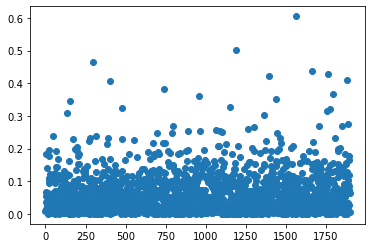

In [118]:
import matplotlib.pyplot as plt

# Create the indices

indices = range(0,1899)


# Plot of the absolute value of the weights versus the indices
plt.scatter(indices,weights)